In [10]:
import random
myseed=12345
random.seed(myseed)
print(random.randint(0,10),
     random.randint(0,10),
     random.randint(0,10))

6 0 4


In [11]:
# Number of sample
N = 3000
# size of each string
Ls = 16
ch = ['A', 'C', 'G', 'T']
Nc= len(ch)

# data
x = [None] * N
# label
y = [0] * N

gapA = 2
gapB = 1
C0 = ch[3]
C1 = ch[1]
C2 = ch[0]
C3 = ch[0]
print('YES keyA=..',C0,'(',gapA,')',C1,'..')
print('NOT keyB=..',C2,'(',gapB,')',C3,'..')

YES keyA=.. T ( 2 ) C ..
NOT keyB=.. A ( 1 ) A ..


In [12]:
def is_key(s,LS,c0,c1,gap):
    for j in range(Ls-gap):
        if s[j]==c0 and s[j+gap]==c1:
            return True
    return False    

In [13]:
random.seed(myseed)

for n in range(N):
    s=""
    for j in range(Ls):
        s=s+ch[random.randint(0,Nc-1)]
    if is_key(s,Ls,C0,C1,gapA) and not is_key(s,Ls,C2,C3,gapB):
        y[n]=1
    x[n]=s
    
for n in range(10):
    print(x[n],y[n])

print('YES keyA=..',C0,'(',gapA-1,')',C1,'..')
print('NOT keyB=..',C2,'(',gapB-1,')',C3,'..')

print(sum(y)/N)

TAGGCGTCGATGCCGA 1
TCCCACGGATGATAAC 0
CGATACTCGACATCCG 1
TCACGACCGGCTGAAA 0
TATCAGCATAATGTCG 0
ACATCGCCCCGCAACA 0
TCAGTATTCCCAGGCT 1
CCCTTGAATCCCCGGC 0
AGTAGAACGAGTGTGT 0
GGTTAGTACGCAAAAC 0
YES keyA=.. T ( 1 ) C ..
NOT keyB=.. A ( 0 ) A ..
0.32033333333333336


In [14]:
#import subprocess
#subprocess.run(["mkdir","DATA"])
import os
os.system("mkdir DATA")

import csv
with open('DATA/sequences'+str(Ls)+'.csv',mode="w") as myfile:
    writer=csv.writer(myfile,delimiter=',')
    for n in range(N):
        writer.writerow([x[n],y[n]])

In [15]:
TAGGCGTCGATG,0
CCGATCCCACGG,1
ATGATAACCGAT,0
ACTCGACATCCG,1
TCACGACCGGCT,0
GAAATATCAGCA,0
TAATGTCGACAT,0
CGCCCCGCAACA,0
TCAGTATTCCCA,1
GGCTCCCTTGAA,0

NameError: name 'TAGGCGTCGATG' is not defined

### -----------------------------------------------------------------------------------------------------------------------------

### Packages

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
import time
import math


### Data(strings) and splitting

In [17]:
frame="DATA/sequences16.csv"
sx, sy = np.loadtxt(frame,delimiter=",",
                   usecols=(0,1), unpack=True, dtype=str)
N =len(sy)
Ls = len(sx[0])
print(N)
print(Ls)
print(sx[0], sy[0])
print(sx[1], sy[1])

perc_train = 0.8
N_train = int(N*perc_train)
N_test = N - N_train
print(f'\ndata: {N}\ntrain:{N_train}\ntest:{N_test}')

3000
16
TAGGCGTCGATGCCGA 1
TCCCACGGATGATAAC 0

data: 3000
train:2400
test:600


In [18]:
Q = ["A", "C", "G", "T"]
Nc = 4
onehc = {Q[i]:i for i in range(Nc)}
print(onehc)

{'A': 0, 'C': 1, 'G': 2, 'T': 3}


### Data conversion

In [32]:
y = sy.astype(int)

L = Ls*Nc
print(L)

x = np.zeros((N,L))
print(x[0])

for n in range(N):
    for i in range(Ls):
        x[n][i*4+onehc[sx[n][i]]] = 1
        
print(sx[0])
print(x[0])
        

64
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
TAGGCGTCGATGCCGA
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]


In [33]:
print(x)
print(x[n])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
2999


### Split train/test-validation

In [20]:
(x_train, y_train) = (x[:N_train], y[:N_train])
(x_test, y_test) = (x[N_train:], y[N_train:])

print(y_train.sum() / N_train)
print(y_test.sum() / N_test)

0.3229166666666667
0.31


### Definition of model in Keras

In [21]:
np.random.seed(123)

model = Sequential()

model.add(Dense(L,input_shape=(L,),activation="relu"))
model.add(Dense(L/2,activation="relu"))
model.add(Dense(L/4,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="tanh"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
opt1 = SGD(learning_rate=0.1,
          momentum=0.9,
          nesterov=True)


model.compile(loss="binary_crossentropy",
             optimizer=opt1,
             metrics=['accuracy'])

In [23]:
fit = model.fit(x_train, y_train, 
               epochs=30, batch_size=100,
               validation_data=(x_test,y_test),
               shuffle=True)

Epoch 1/30
24/24 [==============================] - 2s 48ms/step - loss: 1.4629 - accuracy: 0.6404 - val_loss: 0.6123 - val_accuracy: 0.6900
Epoch 2/30
24/24 [==============================] - 0s 6ms/step - loss: 0.8426 - accuracy: 0.6481 - val_loss: 4.7817 - val_accuracy: 0.6900
Epoch 3/30
24/24 [==============================] - 0s 7ms/step - loss: 4.2567 - accuracy: 0.6420 - val_loss: 4.7817 - val_accuracy: 0.6900
Epoch 4/30
24/24 [==============================] - 0s 7ms/step - loss: 4.0299 - accuracy: 0.6745 - val_loss: 4.7817 - val_accuracy: 0.6900
Epoch 5/30
24/24 [==============================] - 0s 10ms/step - loss: 4.1111 - accuracy: 0.6751 - val_loss: 4.7817 - val_accuracy: 0.6900
Epoch 6/30
24/24 [==============================] - 0s 10ms/step - loss: 3.9762 - accuracy: 0.6885 - val_loss: 4.7817 - val_accuracy: 0.6900
Epoch 7/30
24/24 [==============================] - 0s 10ms/step - loss: 4.1105 - accuracy: 0.6831 - val_loss: 4.7817 - val_accuracy: 0.6900
Epoch 8/30
24/24

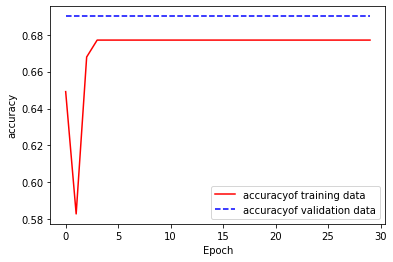

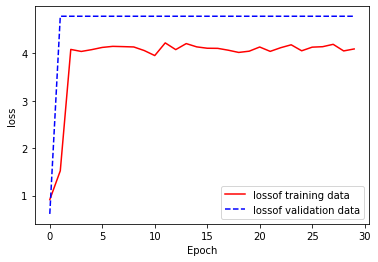

In [24]:
for obs in ('accuracy', 'loss'):
    plt.figure(figsize=(6,4))
    plt.plot(fit.history[obs], 'r',
            label=obs+'of training data')
    #dash line
    plt.plot(fit.history['val_'+obs],'b--',
            label=obs+'of validation data')
    plt.ylabel(obs)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    